In [1]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
from qetpy.utils import lowpassfilter 
from qetpy import autocuts
import cdms
#from CDMSDataCatalog import CDMSDataCatalog
import scipy.optimize as optimize
import matplotlib as mpl
import pickle as pkl
import os, sys
import ROOT as rt

/cvmfs/cdms.opensciencegrid.org/releases/centos7/V04-00/lib/python3.7/site-packages/datacat/model.py:2: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import OrderedDict, MutableMapping


Welcome to JupyROOT 6.22/00


In [37]:
base="/sdf/group/supercdms/data/CDMS/CUTE/R37/Processed/Prompt/Prompt_V04-15_P0.2.1/Submerged"

# series = {
#     '7hr' : '23231219_034952',
#     '6hr' : '23231219_110331'
    
# }

# lname = series
# filePath = {}

# for key in series.keys():
    
#     filePath[key] = '%s/Prompt_V04-15_P0.2.1_%s.root'%(base,series[key])
#     if(os.path.exists(filePath[key])):
#         print(key,' : ',filePath[key])
#     else:
#         print('not found: ',filePath[key])


        

series = ['23231221_015705','23231220_190923','23231220_122140','23231220_053358','23231220_012745',
         '23231219_184002','23231219_110331','23231219_034952','23231218_223530','23231218_190035',
         '23231218_152721','23231218_093255','23231217_212512','23231217_171613','23231217_135018']

filePath = []

for ser in series:
    
    fp = '%s/Prompt_V04-15_P0.2.1_%s.root'%(base,ser)
    if(os.path.exists(fp)):
        print(ser,' : ',fp)
        filePath.append(fp)
    else:
        print('not found: ',fp)

23231221_015705  :  /sdf/group/supercdms/data/CDMS/CUTE/R37/Processed/Prompt/Prompt_V04-15_P0.2.1/Submerged/Prompt_V04-15_P0.2.1_23231221_015705.root
23231220_190923  :  /sdf/group/supercdms/data/CDMS/CUTE/R37/Processed/Prompt/Prompt_V04-15_P0.2.1/Submerged/Prompt_V04-15_P0.2.1_23231220_190923.root
23231220_122140  :  /sdf/group/supercdms/data/CDMS/CUTE/R37/Processed/Prompt/Prompt_V04-15_P0.2.1/Submerged/Prompt_V04-15_P0.2.1_23231220_122140.root
23231220_053358  :  /sdf/group/supercdms/data/CDMS/CUTE/R37/Processed/Prompt/Prompt_V04-15_P0.2.1/Submerged/Prompt_V04-15_P0.2.1_23231220_053358.root
23231220_012745  :  /sdf/group/supercdms/data/CDMS/CUTE/R37/Processed/Prompt/Prompt_V04-15_P0.2.1/Submerged/Prompt_V04-15_P0.2.1_23231220_012745.root
23231219_184002  :  /sdf/group/supercdms/data/CDMS/CUTE/R37/Processed/Prompt/Prompt_V04-15_P0.2.1/Submerged/Prompt_V04-15_P0.2.1_23231219_184002.root
23231219_110331  :  /sdf/group/supercdms/data/CDMS/CUTE/R37/Processed/Prompt/Prompt_V04-15_P0.2.1/Su

In [38]:
# Get trees from RQ file

# RQ=[]
# for i,key in enumerate(series.keys()):
#     RQ.append(uproot.open(filePath[key])['rqDir/zip1']) 

# eventTree=[]
# for i,key in enumerate(series.keys()):
#     eventTree.append(uproot.open(filePath[key])['rqDir/eventTree']) 
    
RQ=[]
for i,ser in enumerate(series):
    RQ.append(uproot.open(filePath[i])['rqDir/zip1']) 

eventTree=[]
for i,ser in enumerate(series):
    eventTree.append(uproot.open(filePath[i])['rqDir/eventTree']) 
    
    
print('Done!')


Done!


In [39]:
#Load RQs from processed files
channels=['PT','PAS1','PBS1','PCS1','PDS1','PES1','PFS1','PAS2','PBS2','PCS2','PDS2','PES2','PFS2']

OFchiq={}
OFamps={}
OFdelay={}
OFamps0={}
OFnorms={}
OFbs={}
# for i,key in enumerate(series.keys()):
#     tc={}
#     ta={}
#     td={}
#     ta0={}
#     tn = {}
#     tbs = {}
#     for c in channels:
#         tc[c]=(RQ[i].array(c+"OFchisq"))
#         ta[c]=(RQ[i].array(c+"OFamps"))
#         ta0[c]=(RQ[i].array(c+"OFamps0"))
#         td[c]=(RQ[i].array(c+"OFdelay"))
#         if(c!='PT'):
#             tn[c] = (RQ[i].array(c+"norm"))
#             tbs[c] = (RQ[i].array(c+"bs"))
#     OFchiq[series[key]]=tc
#     OFamps[series[key]]=ta
#     OFamps0[series[key]]=ta0
#     OFdelay[series[key]]=td
#     OFnorms[series[key]]=tn
#     OFbs[series[key]]=tbs
    
for i,key in enumerate(series):
    tc={}
    ta={}
    td={}
    ta0={}
    tn = {}
    tbs = {}
    for c in channels:
        tc[c]=(RQ[i].array(c+"OFchisq"))
        ta[c]=(RQ[i].array(c+"OFamps"))
        ta0[c]=(RQ[i].array(c+"OFamps0"))
        td[c]=(RQ[i].array(c+"OFdelay"))
        if(c!='PT'):
            tn[c] = (RQ[i].array(c+"norm"))
            tbs[c] = (RQ[i].array(c+"bs"))
    OFchiq[key]=tc
    OFamps[key]=ta
    OFamps0[key]=ta0
    OFdelay[key]=td
    OFnorms[key]=tn
    OFbs[key]=tbs
    print('%s loaded'%(key))
    
        
print('Done!')

23231221_015705 loaded
23231220_190923 loaded
23231220_122140 loaded
23231220_053358 loaded
23231220_012745 loaded
23231219_184002 loaded
23231219_110331 loaded
23231219_034952 loaded
23231218_223530 loaded
23231218_190035 loaded
23231218_152721 loaded
23231218_093255 loaded
23231217_212512 loaded
23231217_171613 loaded
23231217_135018 loaded
Done!


In [40]:
# Get event info from processed files

TriggerTime=[]
TriggerType=[]
EventNumber=[]
TrigDet=[]
TriggerMask=[]
EventTime=[]
# for i,key in enumerate(series.keys()):
#     TriggerTime.append(eventTree[i].array("TriggerTime"))
#     TriggerType.append(eventTree[i].array("TriggerType"))
#     EventNumber.append(eventTree[i].array("EventNumber"))
#     TrigDet.append(eventTree[i].array("TriggerDetectorNum"))
#     TriggerMask.append(eventTree[i].array("TriggerMask"))
#     EventTime.append(eventTree[i].array("EventTime"))
    
    
for i,key in enumerate(series):
    TriggerTime.append(eventTree[i].array("TriggerTime"))
    TriggerType.append(eventTree[i].array("TriggerType"))
    EventNumber.append(eventTree[i].array("EventNumber"))
    TrigDet.append(eventTree[i].array("TriggerDetectorNum"))
    TriggerMask.append(eventTree[i].array("TriggerMask"))
    EventTime.append(eventTree[i].array("EventTime"))
    print('%s loaded'%(key))
print('Done!')

23231221_015705 loaded
23231220_190923 loaded
23231220_122140 loaded
23231220_053358 loaded
23231220_012745 loaded
23231219_184002 loaded
23231219_110331 loaded
23231219_034952 loaded
23231218_223530 loaded
23231218_190035 loaded
23231218_152721 loaded
23231218_093255 loaded
23231217_212512 loaded
23231217_171613 loaded
23231217_135018 loaded
Done!


In [15]:
def ntl_gain(voltage, material):
    eps = 2.98 # average energy needed to produce 1 eh pair in ev
    if((material == 'si') or (material == 'Si') or (material == 'SI') or (material == 'silicon') or (material == 'Silicon')):
        eps = 3.6
    return((1.0+(voltage/eps)))
        

In [75]:
1.4*ntl_gain(50,'Ge')

24.889932885906042

In [50]:
([] + [1,1,1])

[1, 1, 1]

data loaded..


KeyboardInterrupt: 

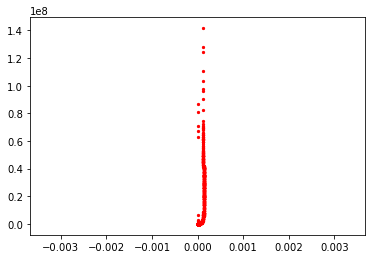

In [86]:
x = []
y = []
chan = 'PT'
for idx,key in enumerate(series):
    mask = (TriggerType[idx] == 1) & (OFamps[key][chan] > 0.) & (TrigDet[idx] == 1)
    x += (OFamps[key][chan][mask]).tolist()
    y += (OFchiq[key][chan][mask]).tolist()
#     print(len(OFchiq[key][chan][mask]))
#     print(OFchiq[key][chan][mask])
#     print(len(y))
#     print(y)
    #print(y)
    break
#print(x)
print('data loaded..')
plt.figure()

for i in range(len(x)):
    plt.scatter(x[i],y[i],s=5,color='r')
#plt.xlim(0,40)
# plt.ylim(1e4,1e8)


plt.xscale("log")
plt.yscale("log")
plt.xlabel("OFamps")
plt.ylabel("OF chisq")
plt.title(key+ ' : ' + chan)
#plt.savefig("./plots/reverse_cal/OF_chi2_%s_scatter.png"%(c))
plt.show()

In [79]:
len(y)

381316

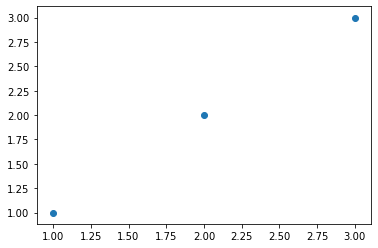

In [83]:
plt.scatter([1,2,3],[1,2,3])

In [73]:
h_pt = rt.TH1F('h_pt','h_pt',550,0,55)
h_pt.GetXaxis().SetTitle('PTOFamp [uA]')
h_pt.GetYaxis().SetTitle('Counts')

h_pt_log = rt.TH1F('h_pt_log','h_pt_log',500,-6,-4)
h_pt_log.GetXaxis().SetTitle('PTOFamp')
h_pt_log.GetYaxis().SetTitle('Counts')


for idx, key in enumerate(series):
#     if(idx != 1):
#         continue
    mask = (TriggerType[idx] == 1) & (TrigDet[idx] == 1) #& (OFamps[key][chan] > 1e-6) # & (OFchiq[series[key]][chan] < 1.e5)
    x = OFamps[key][chan][mask]
    for value in x:
        if(value > 0.3e-6):
            h_pt.Fill(value*1e6)
        h_pt_log.Fill(np.log10(value))
    print('%s loaded'%(key))
print('Done!')

/cvmfs/sft.cern.ch/lcg/views/LCG_98py3cu10/x86_64-centos7-gcc8-opt/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in log10


23231221_015705 loaded
23231220_190923 loaded
23231220_122140 loaded
23231220_053358 loaded
23231220_012745 loaded
23231219_184002 loaded
23231219_110331 loaded
23231219_034952 loaded
23231218_223530 loaded
23231218_190035 loaded
23231218_152721 loaded
23231218_093255 loaded
23231217_212512 loaded
23231217_171613 loaded
23231217_135018 loaded
Done!


Warning in <TROOT::Append>: Replacing existing TH1: h_pt (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_pt_log (Potential memory leak).


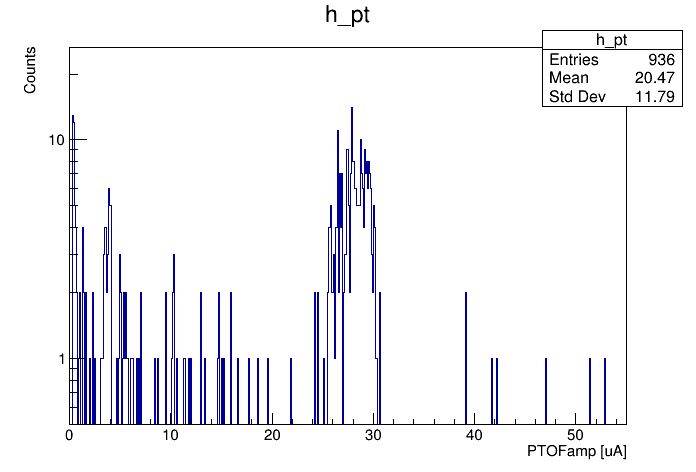

In [72]:
h_pt.Draw()
can.SetLogy(1)
can.Draw()

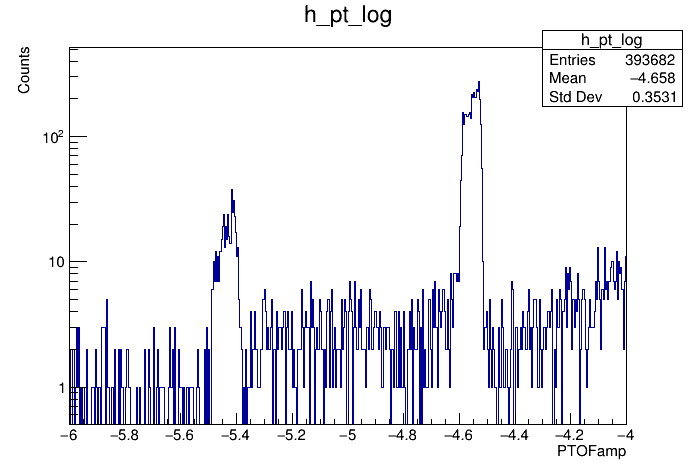

In [74]:
h_pt_log.Draw()
can.SetLogy(1)
can.Draw()

30431
30431


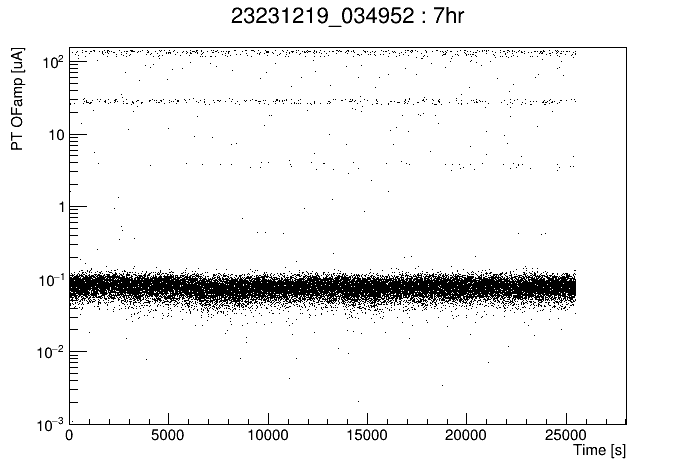

In [12]:
can = rt.TCanvas()
#gr_amp_t = rt.TGraph('gr_amp_t','gr_amp_t',0,10e3)
chan = 'PT'
idx = 0
key = list(series.keys())[idx]
mask = (TriggerType[idx] == 1) & (OFamps[series[key]][chan] > 0.) & (EventTime[idx] > 0.) & (TrigDet[idx] == 1)
t0 = EventTime[idx][mask][0]
#EventTime[0][mask] - t0

x = EventTime[idx][mask] - t0
y = OFamps[series[key]][chan][mask]*1e6
gr_amp_t = rt.TGraph(len(x),x,y)
gr_amp_t.SetTitle(series[key]+ ' : ' +key )
gr_amp_t.GetXaxis().SetTitle('Time [s]')
gr_amp_t.GetYaxis().SetTitle('PT OFamp [uA]')
gr_amp_t.Draw('AP')
can.SetLogy()
can.Draw()
print(len(x))
print(len(y))